In [1]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns; sns.set()  #plot styling
from sklearn.preprocessing import StandardScaler

In [2]:
#Install and import RDKit utilities
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 9.6 MB/s eta 0:00:00


In [3]:
class RDKit_2D:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def compute_2Drdkit(self, name):
        rdkit_2d_desc = []
        calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
        header = calc.GetDescriptorNames()
        for i in range(len(self.mols)):
            ds = calc.CalcDescriptors(self.mols[i])
            rdkit_2d_desc.append(ds)
        df = pd.DataFrame(rdkit_2d_desc,columns=header)
        df.insert(loc=0, column='Isomeric SMILES', value=self.smiles)
        df.to_csv(name[:-4]+'_RDKit_2D.csv', index=False)

In [4]:
descriptors_list = [x[0] for x in Descriptors._descList]

In [5]:
def compute_2Drdkit(self, name):
  rdkit_2d_desc = []
  calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
  header = calc.GetDescriptorNames()
  for i in range(len(self.mols)):
    ds = calc.CalcDescriptors(self.mols[i])
    rdkit_2d_desc.append(ds)
    df = pd.DataFrame(rdkit_2d_desc,columns=header)
    df.insert(loc=0, column='Isomeric SMILES', value=self.smiles)
    df.to_csv(name[:-4]+'_RDKit_2D.csv', index=False)

In [6]:
df = pd.read_excel('InputData.xlsx')

In [7]:
RDKit_descriptor = RDKit_2D(df["Isomeric SMILES"])       # create your RDKit_2D object and provide smiles
RDKit_descriptor.compute_2Drdkit('descriptors.csv') # compute RDKit_2D and provide the name of your desired output file.

[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerat

In [8]:
descriptors = pd.read_csv("descriptors_RDKit_2D.csv")

In [11]:
#Check Not A Number values in columns
NaN = descriptors.isna().sum()
print(NaN)
for column in descriptors.columns.values.tolist():
  descriptors.dropna(subset=[column], inplace=True)
#Check null values in columns
null = descriptors.isnull().sum()
print(null)
#Check unique values in columns
for col in descriptors.columns:
    if len(descriptors[col].unique()) <= 2:
        descriptors.drop(col,inplace=True,axis=1)


Isomeric SMILES           0
MaxAbsEStateIndex         0
MaxEStateIndex            0
MinAbsEStateIndex         0
MinEStateIndex            0
                         ..
fr_ketone                 0
fr_ketone_Topliss         0
fr_phenol                 0
fr_phenol_noOrthoHbond    0
fr_unbrch_alkane          0
Length: 131, dtype: int64
Isomeric SMILES           0
MaxAbsEStateIndex         0
MaxEStateIndex            0
MinAbsEStateIndex         0
MinEStateIndex            0
                         ..
fr_ketone                 0
fr_ketone_Topliss         0
fr_phenol                 0
fr_phenol_noOrthoHbond    0
fr_unbrch_alkane          0
Length: 131, dtype: int64


In [13]:
data = pd.concat([df[['Identified', 'Name']], descriptors, df[['P', 'T', 'v/v']], df['GL-LC-MS']], axis=1, join='inner')

In [15]:
data1 = data[['Identified','Name','Isomeric SMILES']]
data2 = data.drop(['Identified','Name','Isomeric SMILES'], axis=1)
columns = data2.columns

<Axes: >

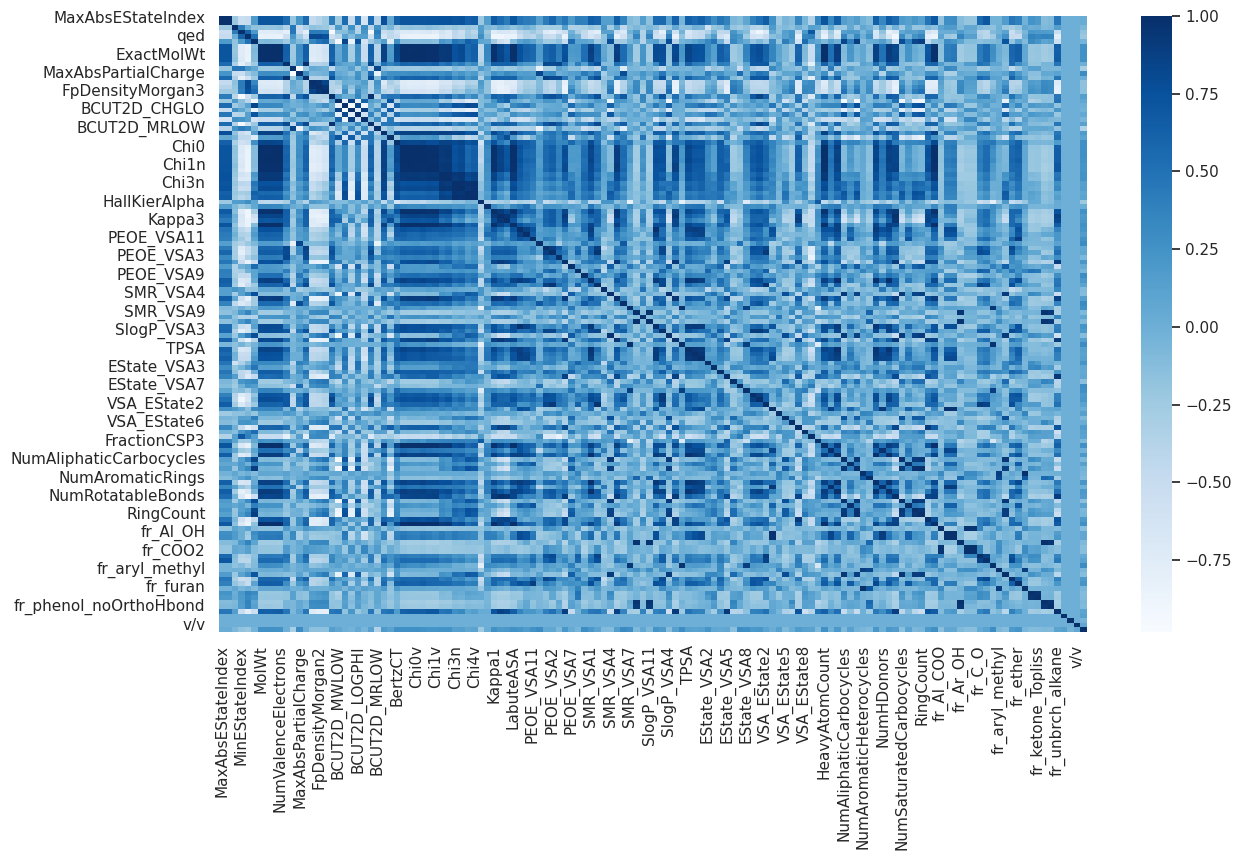

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(data2.corr(numeric_only=True), cmap='Blues')

In [17]:
#Escalado de datos por Desviación Estandar
sc = StandardScaler()
scaled_descriptors = sc.fit_transform(data2)
scaled_descriptors_df = pd.DataFrame(scaled_descriptors, columns = columns)

In [18]:
corr_matrix = scaled_descriptors_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
scaled_descriptors_df.drop(to_drop, axis=1, inplace=True)

In [19]:
conditions = scaled_descriptors_df[['P', 'T', 'v/v']]

<Axes: >

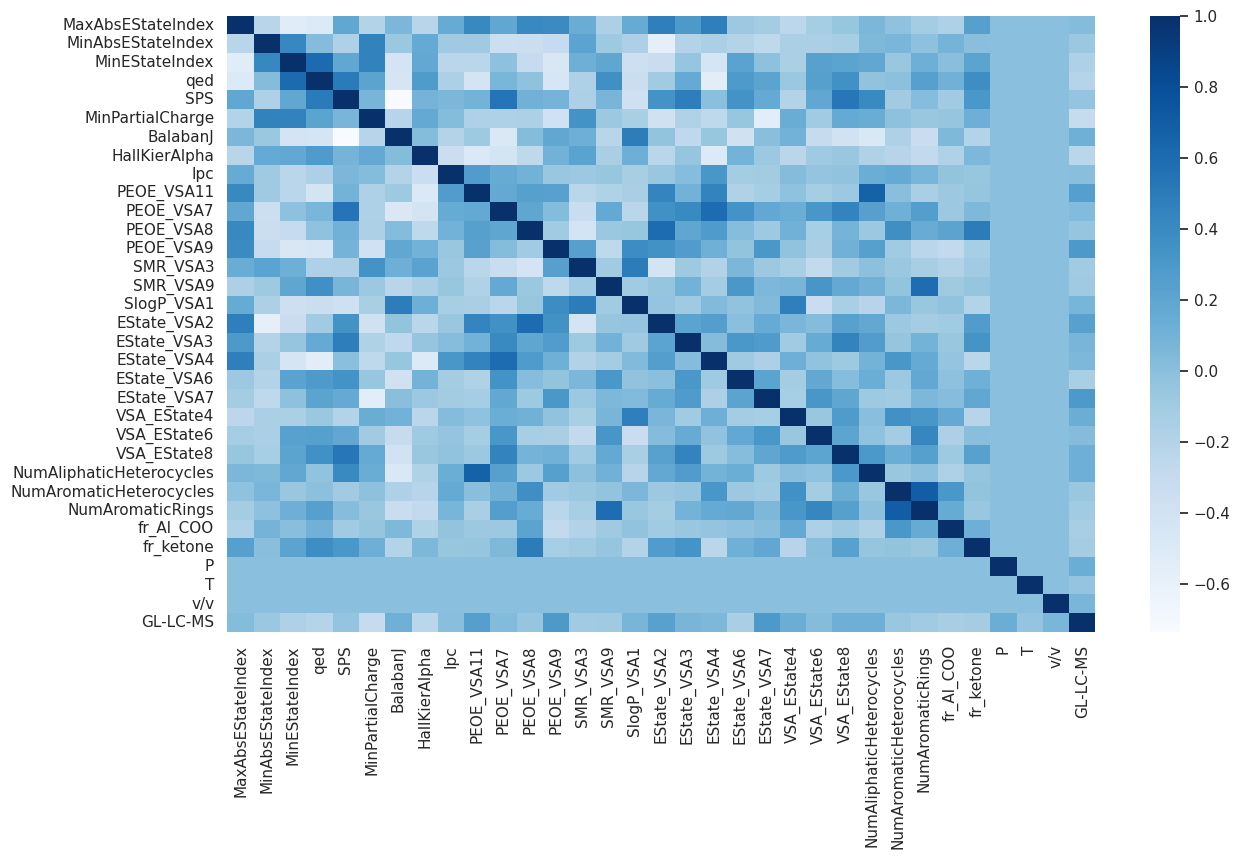

In [20]:
plt.figure(figsize=(14,8))
sns.heatmap(scaled_descriptors_df.corr(numeric_only=True), cmap='Blues')

In [21]:
data = pd.concat([data1, scaled_descriptors_df], axis=1)

<Axes: >

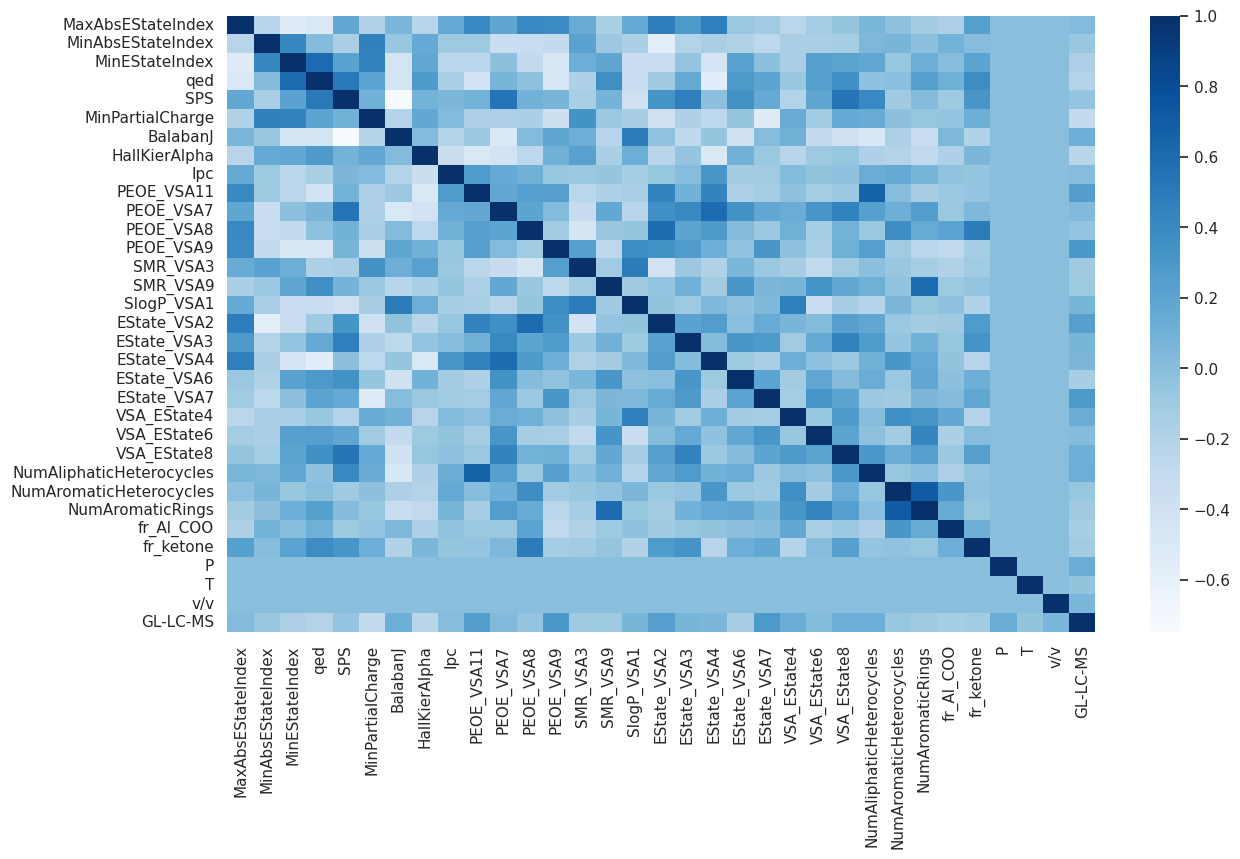

In [ ]:
plt.figure(figsize=(14,8))
data3 = data.drop(['Identified', 'Name', 'Isomeric SMILES'], axis=1)
sns.heatmap(data3.corr(numeric_only=True), cmap='Blues')

In [22]:
data.to_excel("StandarScaledData.xlsx", index = False)